In [1]:
import csv

STOCKS_FILE_NAME = 'N7.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks

['PIH',
 'FLWS',
 'FCCY',
 'SRCE',
 'VNET',
 'TWOU',
 'JOBS',
 'CAFD',
 'EGHT',
 'AVHI',
 'SHLM',
 'AAON',
 'ABAX',
 'ABEO',
 'ABEOW',
 'ABIL',
 'ABMD',
 'AXAS',
 'ACIU',
 'ACIA',
 'ACTG',
 'ACHC',
 'ACAD',
 'ACST',
 'AXDX',
 'ACCP',
 'XLRN',
 'ANCX',
 'ARAY',
 'ACRX',
 'ACET',
 'AKAO',
 'ACHN',
 'ACIW',
 'ACRS',
 'ACNB',
 'ACOR',
 'ATVI',
 'ACTA',
 'ACXM',
 'ADMS',
 'ADMP',
 'ADAP',
 'ADUS',
 'AEY',
 'IOTS',
 'ADMA',
 'ADBE',
 'ADTN',
 'ADRO',
 'AAAP',
 'ADES',
 'AEIS',
 'AMD',
 'ADXS',
 'ADXSW',
 'ADVM',
 'MAUI',
 'AEGN',
 'AGLE',
 'AEHR',
 'AMTX',
 'AERI',
 'AVAV',
 'AEZS',
 'AEMD',
 'GNMX',
 'AFMD',
 'AGEN',
 'AGRX',
 'AGYS',
 'AGIO',
 'AGNC',
 'AGNCB',
 'AGNCP',
 'AGFS',
 'AGFSW',
 'AIMT',
 'AIRM',
 'AIRT',
 'ATSG',
 'AIRG',
 'AMCN',
 'AKAM',
 'AKTX',
 'AKBA',
 'AKER',
 'AKRX',
 'AKTS',
 'ALRM',
 'ALSK',
 'AMRI',
 'ALBO',
 'ABDC',
 'ADHD',
 'ALDR',
 'ALDX',
 'ALXN',
 'ALCO',
 'ALGN']

In [2]:
import requests
import csv

def get_minute_data(symbol):        
    url = "https://www.google.com/finance/getprices?i=60&p=10d&f=d,o,h,l,c,v&df=cpct&q={}".format(symbol)
    page = requests.get(url)
    reader = csv.reader(page.content.decode('utf-8').splitlines())
    return symbol, list(reader) 
_, data = get_minute_data("AAPL")
data

[['EXCHANGE%3DNASDAQ'],
 ['MARKET_OPEN_MINUTE=570'],
 ['MARKET_CLOSE_MINUTE=960'],
 ['INTERVAL=60'],
 ['COLUMNS=DATE', 'CLOSE', 'HIGH', 'LOW', 'OPEN', 'VOLUME'],
 ['DATA='],
 ['TIMEZONE_OFFSET=-240'],
 ['a1490362200', '141.39', '141.5', '141.38', '141.5', '508609'],
 ['1', '141.51', '141.6', '141.3', '141.47', '258859'],
 ['2', '141.2103', '141.55', '141.2103', '141.51', '125895'],
 ['3', '141.33', '141.36', '141.2', '141.219', '111638'],
 ['4', '141.46', '141.48', '141.325', '141.33', '109832'],
 ['5', '141.42', '141.52', '141.371', '141.47', '144205'],
 ['6', '141.5', '141.5', '141.4', '141.4', '56258'],
 ['7', '141.41', '141.56', '141.39', '141.5', '153308'],
 ['8', '141.49', '141.508', '141.4198', '141.42', '59730'],
 ['9', '141.47', '141.59', '141.4', '141.4763', '136182'],
 ['10', '141.4475', '141.49', '141.4', '141.47', '79437'],
 ['11', '141.44', '141.49', '141.42', '141.4501', '56352'],
 ['12', '141.5399', '141.54', '141.445', '141.445', '56585'],
 ['13', '141.4508', '141.575'

In [3]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np

DATA_TIMEZONE = pytz.timezone("US/Eastern")
LOCAL_TZ = pytz.timezone('America/Los_Angeles')

def minute_data_to_df(data):
    base_timestamp = 0
    t, c, h, l, o, v = [[] for i in range(6)]
    for i, row in enumerate(data):
        if len(row) == 6:
            timestamp, close, high, low, open, volume = row
            if timestamp.startswith("a"):
                base_timestamp = int(timestamp[1:])                
            elif timestamp.isnumeric(): 
                delta = timedelta(seconds=60 * (int(timestamp) - 1))
                dt = datetime.fromtimestamp(base_timestamp, tz=DATA_TIMEZONE) + delta
                t.append(dt.astimezone(LOCAL_TZ))
                c.append(float(close))
                h.append(float(high))
                l.append(float(low))
                o.append(float(open))
                v.append(int(volume))
                
    df = df = pd.DataFrame(dict(time=t, close=c, high=h, low=l, open=o, volume=v))
    return df                
    
md_df = minute_data_to_df(data)
md_df

,close,high,low,open,time,volume
0,141.5100,141.6000,141.3000,141.4700,2017-03-24 06:30:00-07:00,258859
1,141.2103,141.5500,141.2103,141.5100,2017-03-24 06:31:00-07:00,125895
2,141.3300,141.3600,141.2000,141.2190,2017-03-24 06:32:00-07:00,111638
3,141.4600,141.4800,141.3250,141.3300,2017-03-24 06:33:00-07:00,109832
4,141.4200,141.5200,141.3710,141.4700,2017-03-24 06:34:00-07:00,144205
5,141.5000,141.5000,141.4000,141.4000,2017-03-24 06:35:00-07:00,56258
6,141.4100,141.5600,141.3900,141.5000,2017-03-24 06:36:00-07:00,153308
7,141.4900,141.5080,141.4198,141.4200,2017-03-24 06:37:00-07:00,59730
8,141.4700,141.5900,141.4000,141.4763,2017-03-24 06:38:00-07:00,136182
9,141.4475,141.4900,141.4000,141.4700,2017-03-24 06:39:00-07:00,79437


In [4]:
last_date = md_df.time.max().date()
print(last_date)
prev_days_data = md_df[md_df.time.dt.date != last_date]
prev_data_len = len(prev_days_data)
prev_close = prev_days_data.iloc[prev_data_len - 1].close
print(prev_close)

2017-04-06
144.02


In [5]:
avg9days = md_df[md_df.time.dt.date != last_date].volume.mean()
print(avg9days)
md_df = md_df[md_df.time.dt.date == last_date].copy()
md_df['prev_close'] = prev_close
md_df['current_score'] = md_df.volume / avg9days
dd_len = len(md_df)
md_df['rolling_score'] = md_df.current_score.rolling(window=dd_len, min_periods=1).mean()
md_df

52526.3897436


,close,high,low,open,time,volume,prev_close,current_score,rolling_score
3510,144.3500,144.4900,144.2100,144.2200,2017-04-06 06:30:00-07:00,189271,144.02,3.603351,3.603351
3511,144.2000,144.4200,144.1400,144.3500,2017-04-06 06:31:00-07:00,261072,144.02,4.970302,4.286826
3512,144.1400,144.2333,144.0500,144.2333,2017-04-06 06:32:00-07:00,149739,144.02,2.850738,3.808130
3513,144.1400,144.2200,144.0500,144.1400,2017-04-06 06:33:00-07:00,106393,144.02,2.025515,3.362476
3514,144.2400,144.2750,144.1400,144.1400,2017-04-06 06:34:00-07:00,109716,144.02,2.088779,3.107737
3515,144.3900,144.3900,144.2300,144.2400,2017-04-06 06:35:00-07:00,95211,144.02,1.812632,2.891886
3516,144.3099,144.4100,144.2799,144.3900,2017-04-06 06:36:00-07:00,117436,144.02,2.235752,2.798153
3517,144.3500,144.3615,144.2500,144.3050,2017-04-06 06:37:00-07:00,82222,144.02,1.565346,2.644052
3518,144.3650,144.4100,144.3200,144.3900,2017-04-06 06:38:00-07:00,48330,144.02,0.920109,2.452503
3519,144.3300,144.4300,144.3200,144.3600,2017-04-06 06:39:00-07:00,93823,144.02,1.786207,2.385873


In [6]:
todays_open = md_df.iloc[0].open
dd_len = len(md_df)
md_df['opening_change'] = (todays_open / md_df['prev_close'] - 1) * 100
md_df['rolling_high'] = md_df.high.rolling(window=dd_len, min_periods=1).max()
md_df['rolling_low'] = md_df.low.rolling(window=dd_len, min_periods=1).min()
md_df['change_current'] = (md_df.close / todays_open - 1) * 100
md_df['change_high'] = (md_df.rolling_high / todays_open - 1) * 100
md_df['change_low'] = (md_df.rolling_low / todays_open - 1) * 100
md_df[["close", "high", "low", "open", "change_current", "change_high", "change_low", "opening_change"]]

,close,high,low,open,change_current,change_high,change_low,opening_change
3510,144.3500,144.4900,144.2100,144.2200,0.090140,0.187214,-0.006934,0.13887
3511,144.2000,144.4200,144.1400,144.3500,-0.013868,0.187214,-0.055471,0.13887
3512,144.1400,144.2333,144.0500,144.2333,-0.055471,0.187214,-0.117875,0.13887
3513,144.1400,144.2200,144.0500,144.1400,-0.055471,0.187214,-0.117875,0.13887
3514,144.2400,144.2750,144.1400,144.1400,0.013868,0.187214,-0.117875,0.13887
3515,144.3900,144.3900,144.2300,144.2400,0.117875,0.187214,-0.117875,0.13887
3516,144.3099,144.4100,144.2799,144.3900,0.062335,0.187214,-0.117875,0.13887
3517,144.3500,144.3615,144.2500,144.3050,0.090140,0.187214,-0.117875,0.13887
3518,144.3650,144.4100,144.3200,144.3900,0.100541,0.187214,-0.117875,0.13887
3519,144.3300,144.4300,144.3200,144.3600,0.076272,0.187214,-0.117875,0.13887


In [11]:
import threading
import queue


def get_data_parallel(symbols):    
    max_threads = 300
    
    def worker():
        while True:
            args = task_queue.get()
            if args is None:
                break
            response = get_minute_data(*args)
            if response:
                result_queue.put(response)
            task_queue.task_done()

    task_queue = queue.Queue()
    result_queue = queue.Queue()

    threads = []
    for i in range(min(max_threads, len(symbols))):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for stock in symbols:
        task_queue.put((stock,))

    # block until all tasks are done
    task_queue.join()

    # stop workers
    for i in range(len(threads)):
        task_queue.put(None)

    for t in threads:
        t.join()
        
    # now process results
    df = None
    while True:
        try:
            symbol, raw_data = result_queue.get(block=False)
        except queue.Empty:
            break
        else:
            data = minute_data_to_df(raw_data)
            if len(data):
                last_date = data.time.max().date()

                prev_days_data = data[data.time.dt.date != last_date]
                prev_data_len = len(prev_days_data)
                prev_close = prev_days_data.iloc[prev_data_len - 1].close
                avg9days = prev_days_data.volume.mean()

                data = data[data.time.dt.date == last_date].copy()
                data['symbol'] = symbol
                data['prev_close'] = prev_close
                data['avg9days'] = avg9days
                data['current_score'] = data.volume / avg9days
                dd_len = len(data)
                data['rolling_score'] = data.current_score.rolling(window=dd_len, min_periods=1).mean()

                todays_open = data.iloc[0].open
                data['opening_change'] = (todays_open / data['prev_close'] - 1) * 100
                data['rolling_high'] = data.high.rolling(window=dd_len, min_periods=1).max()
                data['rolling_low'] = data.low.rolling(window=dd_len, min_periods=1).min()
                data['change_current'] = (data.close / todays_open - 1) * 100
                data['change_high'] = (data.rolling_high / todays_open - 1) * 100
                data['change_low'] = (data.rolling_low / todays_open - 1) * 100

                if df is None:
                    df = data
                else:
                    df = df.append(data, ignore_index=True)            
            
    return df[df.volume.notnull()]

all_dd = get_data_parallel(("AAPL",))
all_dd

,close,high,low,open,time,volume,symbol,prev_close,avg9days,current_score,rolling_score,opening_change,rolling_high,rolling_low,change_current,change_high,change_low
3510,144.3500,144.4900,144.2100,144.2200,2017-04-06 06:30:00-07:00,189271,AAPL,144.02,52526.389744,3.603351,3.603351,0.13887,144.49,144.2100,0.090140,0.187214,-0.006934
3511,144.2000,144.4200,144.1400,144.3500,2017-04-06 06:31:00-07:00,261072,AAPL,144.02,52526.389744,4.970302,4.286826,0.13887,144.49,144.1400,-0.013868,0.187214,-0.055471
3512,144.1400,144.2333,144.0500,144.2333,2017-04-06 06:32:00-07:00,149739,AAPL,144.02,52526.389744,2.850738,3.808130,0.13887,144.49,144.0500,-0.055471,0.187214,-0.117875
3513,144.1400,144.2200,144.0500,144.1400,2017-04-06 06:33:00-07:00,106393,AAPL,144.02,52526.389744,2.025515,3.362476,0.13887,144.49,144.0500,-0.055471,0.187214,-0.117875
3514,144.2400,144.2750,144.1400,144.1400,2017-04-06 06:34:00-07:00,109716,AAPL,144.02,52526.389744,2.088779,3.107737,0.13887,144.49,144.0500,0.013868,0.187214,-0.117875
3515,144.3900,144.3900,144.2300,144.2400,2017-04-06 06:35:00-07:00,95211,AAPL,144.02,52526.389744,1.812632,2.891886,0.13887,144.49,144.0500,0.117875,0.187214,-0.117875
3516,144.3099,144.4100,144.2799,144.3900,2017-04-06 06:36:00-07:00,117436,AAPL,144.02,52526.389744,2.235752,2.798153,0.13887,144.49,144.0500,0.062335,0.187214,-0.117875
3517,144.3500,144.3615,144.2500,144.3050,2017-04-06 06:37:00-07:00,82222,AAPL,144.02,52526.389744,1.565346,2.644052,0.13887,144.49,144.0500,0.090140,0.187214,-0.117875
3518,144.3650,144.4100,144.3200,144.3900,2017-04-06 06:38:00-07:00,48330,AAPL,144.02,52526.389744,0.920109,2.452503,0.13887,144.49,144.0500,0.100541,0.187214,-0.117875
3519,144.3300,144.4300,144.3200,144.3600,2017-04-06 06:39:00-07:00,93823,AAPL,144.02,52526.389744,1.786207,2.385873,0.13887,144.49,144.0500,0.076272,0.187214,-0.117875


In [14]:
# getting trade data

from urllib.parse import quote_plus, urlparse, parse_qs
from lxml import html
import re


NUM_THREADS = 300

def pull_trades(proxy, q, r, stock, time, pageno=None):
    
    base_url = "http://www.nasdaq.com/symbol/{symbol}/time-sales?time={time}&pageno={pageno}"
    url = base_url.format(symbol=stock.lower(), time=time, pageno=pageno or 1)
    try:
        page_res = requests.get(url, timeout=6, proxies={'http': "http://{}".format(proxy)})
        tree = html.fromstring(page_res.content)  
    except Exception as e:
        raise ProxyFailException()            
    else:
        if pageno is None:
            pager = tree.find('.//ul[@id="pager"]')
            if pager is not None:
                page_links = pager.findall('.//a')
                if page_links:
                    href = page_links[-1].attrib['href']
                    parsed_url = urlparse(href)
                    query_params = parse_qs(parsed_url.query)
                    max_page = int(query_params['pageno'][0])

                    for pn in range(1, max_page + 1):
                        q.put((stock, time, pn))
            else:
                raise ProxyFailException('The pager is missing')

        select = tree.find('.//select[@id="quotes_content_left_DropDowntimerange"]')
        if select is None or int(select.value) != time:
            raise ProxyFailException('Wrong response from server')

        table = tree.find('.//table[@id="AfterHoursPagingContents_Table"]')
        if table is None:
            raise ProxyFailException('The table is missing')
        else:
            for row in table:
                if row.tag == 'tr':
                    r.put((stock, time) + tuple(col.text_content() for col in row))

class ProxyFailException(Exception):
    pass    

def load_trades_data(symbol_data, now):   
    
    tasks = queue.Queue() # queue with arguments for the 'get_transactions' function
    responses = queue.Queue() # queue with raw responses  
    proxies = queue.Queue()
    
    with open("approved_proxies.csv", "r") as f:
        proxies_list = f.read().split()
        
    for p in proxies_list:
        proxies.put(p)
        
    def get_proxy():
        try:
            proxy = proxies.get_nowait()
        except queue.Empty:        
            pass
        else:    
            return proxy
    
    def worker():        
        proxy = get_proxy()        
        while proxy is not None:            
            args = tasks.get()
            if args is None:
                break   
            while True:
                try:
                    pull_trades(proxy, tasks, responses, *args)
                    
                except ProxyFailException as e:
                    proxy = get_proxy()
                    if proxy is None:
                        tasks.put(args)  # put the task back and die
                        break                    
                else:
                    break   
            tasks.task_done()
    

    threads = []
    for i in range(NUM_THREADS):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for symbol, times in symbol_data.items():
        for time in times:
            tasks.put((symbol, time))

    # block until all tasks are done
    tasks.join()

    # stop workers
    for i in range(len(threads)):
        tasks.put(None)

    for t in threads:
        t.join()
    
    # save responses from the queue to pandas dataframe
    #df = pd.DataFrame([], columns=('Symbol', 'TimePeriod', 'Minute', 'Price', 'Volume'))
    symbols, time_periods, prices, volumes, times = tuple([] for i in range(5))
    while True:
        try:
            symbol, time_period, time_s, price, volume = responses.get(block=False)
        except queue.Empty:
            break
        else:             
            volume = int(re.sub(r'[^\d]+', '', volume))
            if volume >= 1000:
                minute = re.sub(r'[^\d:]+', '', time_s)[:5] 
                trade_time = now.astimezone(DATA_TIMEZONE).replace(
                    hour=int(minute[:2]), minute=int(minute[3:5]), second=0, microsecond=0, 
                ).astimezone(LOCAL_TZ)
                
                symbols.append(symbol)
                time_periods.append(time_period)
                prices.append(float(re.sub(r'[^\d\.]+', '', price)))
                volumes.append(volume)
                times.append(trade_time)
            
    df = pd.DataFrame(dict(Symbol=symbols, TimePeriod=time_periods, Price=prices, Time=times, Volume=volumes))
    df['Cost'] = df.Price * df.Volume * 100   
    df['Count'] = 1
    df = df.groupby(['Symbol', 'TimePeriod', 'Time'], as_index=False)['Cost', 'Count'].sum()
    df = df.sort_values(by=['Symbol', 'Time'])    
    return df

now = datetime.now(tz=LOCAL_TZ)
trade_lots_df = load_trades_data({"AAPL": tuple(range(1, 12))}, now) 
trade_lots_df

,Symbol,TimePeriod,Time,Cost,Count
0,AAPL,1,2017-04-06 06:30:00-07:00,2.776676e+09,53
1,AAPL,1,2017-04-06 06:31:00-07:00,1.559703e+09,16
2,AAPL,1,2017-04-06 06:32:00-07:00,5.479955e+08,21
3,AAPL,1,2017-04-06 06:33:00-07:00,3.629301e+08,13
4,AAPL,1,2017-04-06 06:34:00-07:00,4.199313e+08,17
5,AAPL,1,2017-04-06 06:35:00-07:00,1.933985e+08,9
6,AAPL,1,2017-04-06 06:36:00-07:00,2.760075e+08,9
7,AAPL,1,2017-04-06 06:37:00-07:00,3.062071e+08,11
8,AAPL,1,2017-04-06 06:38:00-07:00,1.206601e+08,8
9,AAPL,1,2017-04-06 06:39:00-07:00,3.139207e+08,15


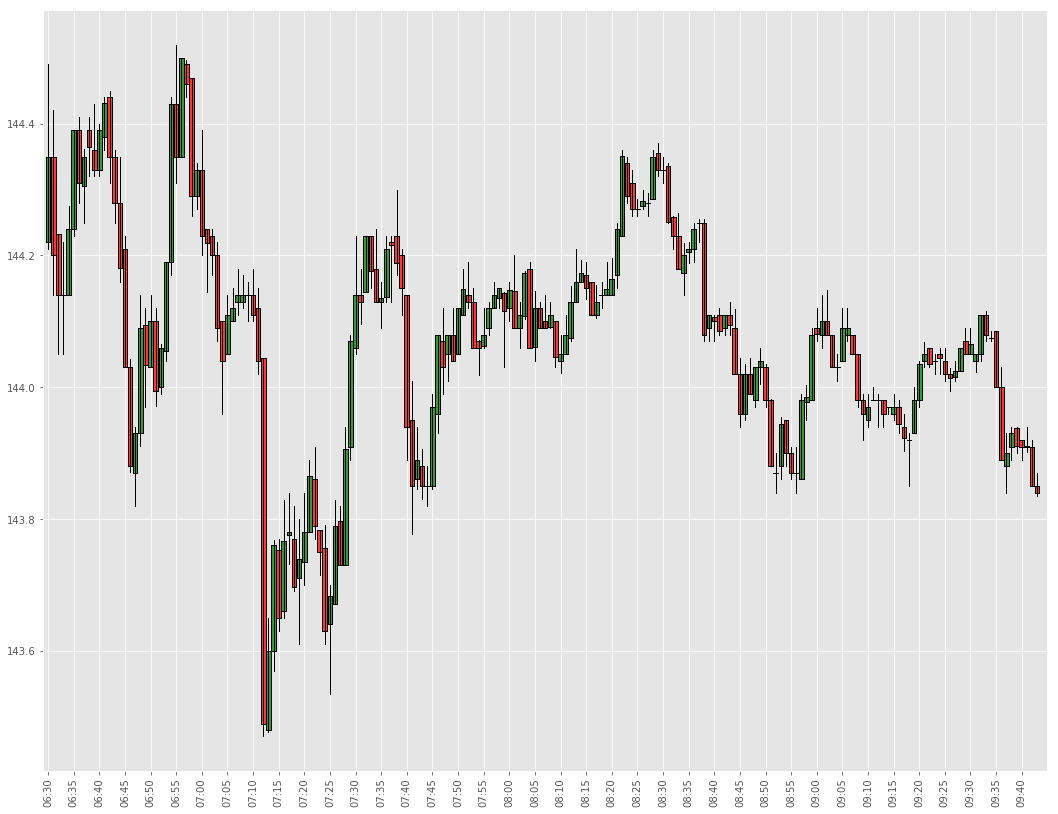

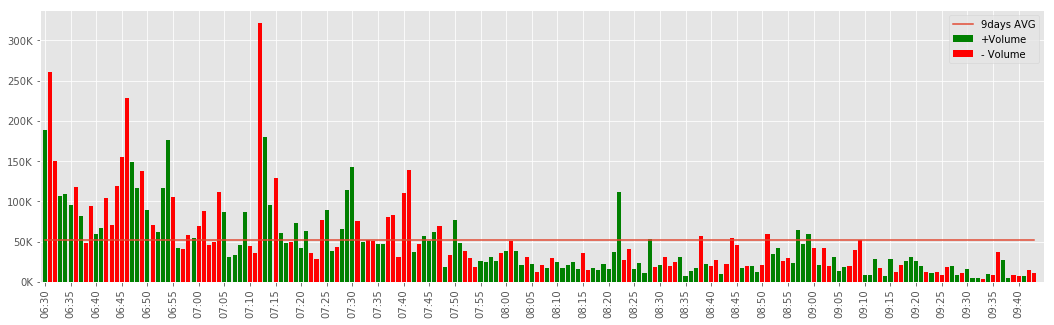

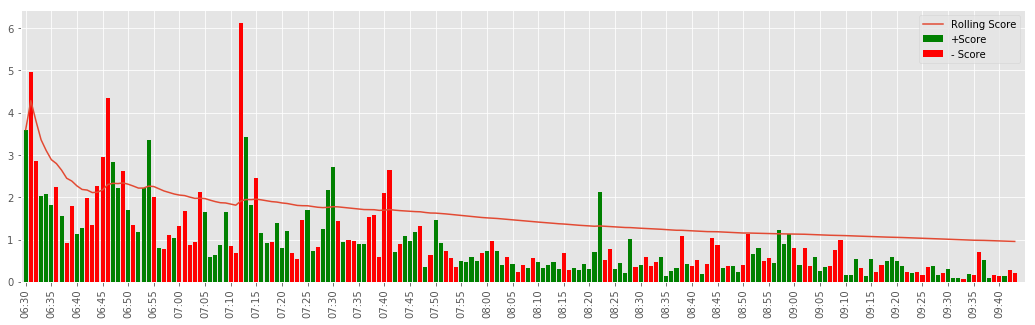

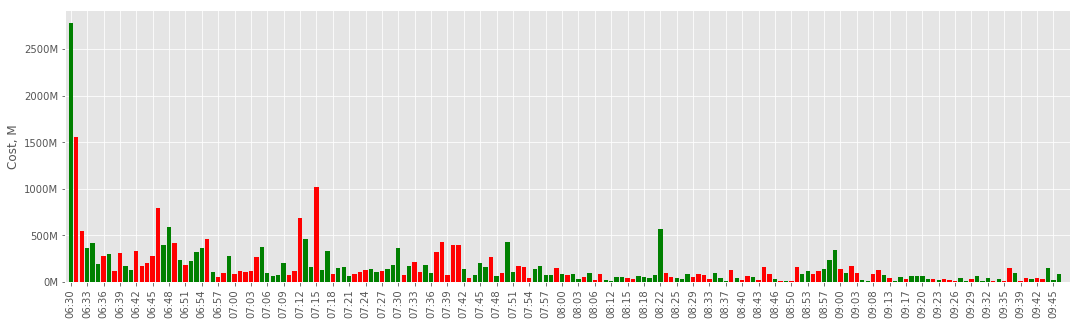

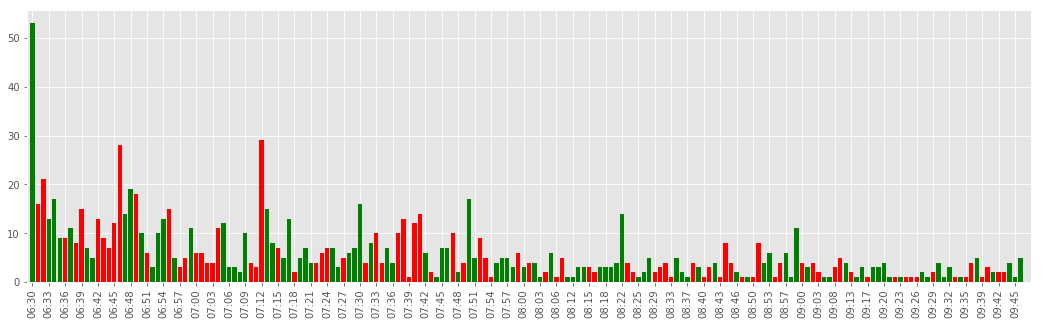

In [15]:
from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker, style
style.use('ggplot')

def display_charts(df, trade_df):
    df = df.reset_index()    
    xticks = [n for n in range(0, len(df), 5)]
    
    # plot data
    fig = plt.figure(figsize=(18, 14)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([df.iloc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(-1, len(df)+1)
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
    ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(-1, len(df)+1)
    # average volume
    ax2.plot(df.index, df.avg9days, label="9days AVG")
    ax2.legend(fancybox=True, loc='best')
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
    ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
    ax3.plot(df.index, df.rolling_score, label="Rolling Score")
    ax3.legend(fancybox=True, loc='best')
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(-1, len(df)+1)
    
    # trades
    len_trade_df = len(trade_df)
    if len_trade_df:
        trade_df = trade_df.reset_index()
        neg_times = set(negative.time.values)
        positive = trade_df[trade_df.Time.isin(neg_times) == False]    
        negative = trade_df[trade_df.Time.isin(neg_times)]


        fig = plt.figure(figsize=(18, 5)) 
        ax4 = plt.subplot(111)  

        if len(positive):
            ax4.bar(positive.index, positive.Cost, color='green', align='center')
        if len(negative):
            ax4.bar(negative.index, negative.Cost, color='red', align='center')
        
        period = len_trade_df // 90 + 1
        xticks = [n for n in range(0, len_trade_df, period)]
        ax4.set_xticks(xticks)
        ax4.set_xticklabels([trade_df.iloc[i].Time.strftime('%H:%M') for i in ax4.get_xticks()], rotation=90)
        ax4.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dM" % (x / 1000000)))
        ax4.set_ylabel('Cost, M')
        ax4.set_xlim(-1, len_trade_df+1)


        fig = plt.figure(figsize=(18, 5)) 
        ax5 = plt.subplot(111)    
        if len(positive):
            ax5.bar(positive.index, positive.Count, color='green', align='center')
        if len(negative):
            ax5.bar(negative.index, negative.Count, color='red', align='center')
        ax5.set_xticks(xticks)
        ax5.set_xticklabels([trade_df.iloc[i].Time.strftime('%H:%M') for i in ax5.get_xticks()], rotation=90)
        ax5.set_xlim(-1, len_trade_df+1)
    
    
    plt.show()

display_charts(all_dd[all_dd.symbol == "AAPL"], trade_lots_df[trade_lots_df.Symbol == "AAPL"])

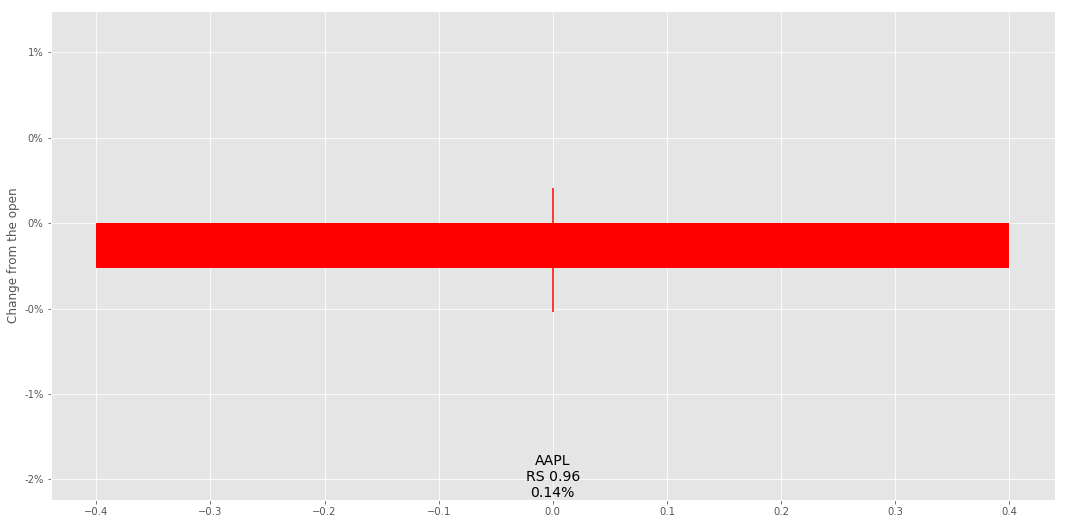

,symbol,close,open,change_current,change_high,change_low,opening_change,rolling_score
0,AAPL,143.84,143.85,-0.263486,0.208016,-0.520039,0.13887,0.959528


In [16]:
def display_summary_chart(dd):
    dd = dd.reset_index()
    positive = dd[dd.change_current >= 0]
    negative = dd[dd.change_current < 0]
    
    fig = plt.figure(figsize=(18, 9)) 
    ax = plt.subplot(111)
    ax.bar(positive.index, positive.change_current, color='green', align='center', label="Pos")
    ax.bar(negative.index, negative.change_current, color='red', align='center', label="Neg")    
    lines = plt.vlines(positive.index, positive.change_low, positive.change_high, colors='g')
    paths1 = lines.get_paths()
    lines = plt.vlines(negative.index, negative.change_low, negative.change_high, colors='r')
    paths2 = lines.get_paths()
    
    def autolabel(rects, dd):        
        for n, rect in enumerate(rects):
            item = dd.iloc[n]            
            box = rect.get_extents()
            x = box.x0            
            y = box.y0 - 1.1 if item.change_current < 0 else box.y1
            ax.text(x, y, "{}\nRS {:.2f}\n{:.2f}%".format(item.symbol, item.rolling_score, item.opening_change), 
                    ha='center', va='bottom', fontsize=14)

    autolabel(paths1, positive)
    autolabel(paths2, negative)
    
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min - 1.1, y_max + 1) 
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "{:.0f}%".format(x)))
    ax.set_ylabel('Change from the open')
    plt.show()

last_minute_dd = all_dd.groupby('symbol').last().reset_index()
display_summary_chart(last_minute_dd)
last_minute_dd[
    ['symbol', 'close', 'open', 'change_current', 'change_high', 'change_low', 'opening_change', 'rolling_score']
]

In [17]:
def get_current_time_period(now):
    lots_times = (
        (6, 59),
        (7, 29),
        (7, 59),
        (8, 29),
        (8, 59),
        (9, 29),
        (9, 59),
        (10,29),
        (10, 59),
        (11, 29),
        (11, 59),
        (12, 29),
        (13, 0),
    )
    for n, i in enumerate(lots_times):
        if i > (now.hour, now.minute):
            break
    
    return n + 1
    

now = datetime.now(tz=LOCAL_TZ)
print(now)
get_current_time_period(now)

2017-04-06 09:48:40.288629-07:00


7

In [18]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
LOCAL_TZ = pytz.timezone('America/Los_Angeles')
stocks = get_stocks()

def display_list_items(top_df, all_df, trade_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol], trade_df[trade_df.Symbol == item.symbol])

last_time = None
trade_lots = None
trade_cache_times = {}


while True:    
    now = datetime.now(tz=LOCAL_TZ)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
                
        # MINUTE DATA            
        df = get_data_parallel(stocks)        
        if df is not None:
            last_minute_data = df.groupby('symbol').last().reset_index()
            top_volumes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]            
            top_symbols = top_volumes.symbol.values
            
            # TRADE DATA
            # check saved periods
            
            current_time_period = get_current_time_period(now)
            symbol_saved_periods = {}
            for symbol in top_symbols:
                saved_time = int(trade_cache_times.get(symbol, 0))
                symbol_saved_periods[symbol] = tuple(range(saved_time + 1, current_time_period + 1))
                trade_cache_times[symbol] = current_time_period - 1
                
            response = load_trades_data(symbol_saved_periods, now)
            res_len = len(response)
            if res_len:            
                if trade_lots is not None:
                    trade_lots = trade_lots.append(response, ignore_index=True)
                else:
                    trade_lots = response
                    
            # DRAW CHARTS
            clear_output()
            display(HTML("<h3>Rolling Score List</h3>"))
            display_summary_chart(top_volumes)
            display_list_items(top_volumes, df, trade_lots)   
            
            # drop current period data 
            trade_lots = trade_lots[trade_lots.TimePeriod != current_time_period]
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=LOCAL_TZ) - now)
        last_time = now        
    else:   
        trade_lots = None
        trade_cache_times = {}
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)

KeyboardInterrupt: 